<a href="https://colab.research.google.com/github/Dhananjay240/programs/blob/master/Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SIMPLE lINEAR REGRESSION TASK - 1**

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Studying hours.csv')
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.shape

(25, 2)

In [4]:
data.describe

<bound method NDFrame.describe of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [5]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

<Figure size 1152x576 with 0 Axes>

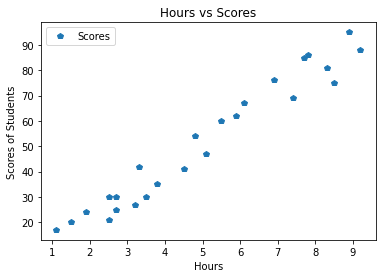

In [6]:
# Plotting the scores of the students
plt.figure(figsize=(16,8))
data.plot(x="Hours",y="Scores",style='p')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores of Students')
plt.show()

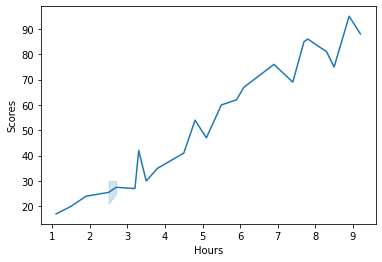

In [7]:
sns.lineplot(x="Hours",y="Scores",data=data)

From the graphs above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# **Preparing The Data**

In [8]:
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [9]:
# Checking for the null values
data.isnull().values.any()

False

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

Training The Algorithm

In [12]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
print(regression_model.coef_)

[9.91065648]


In [14]:
print(regression_model.intercept_)

2.018160041434662


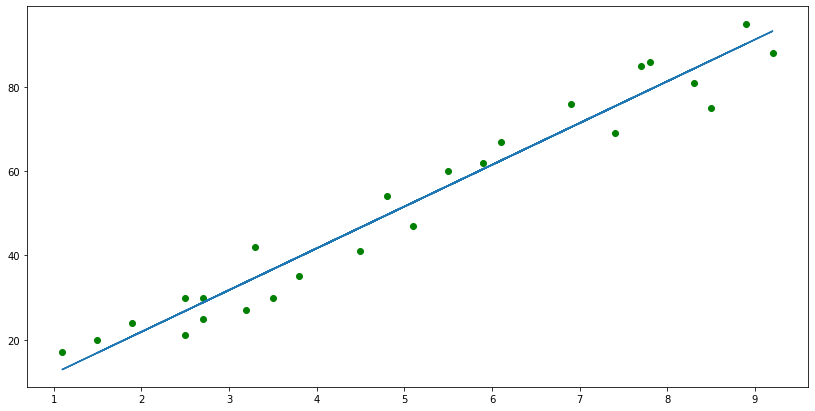

In [17]:
regression_line = regression_model.coef_*X + regression_model.intercept_
# Plotting for the data
plt.figure(figsize=(14,7))
plt.scatter(X, y, c='g', cmap='b',vmin=10,vmax=20)
plt.plot(X, regression_line)
plt.show()

Making Prediction

In [18]:
print(X_test)
print(y_test)
y_prediction = regression_model.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[20 27 69 30 62]


In [19]:
df = pd.DataFrame({'Actual':y_test, 'Prediction':y_prediction})
df

,Actual,Prediction
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [26]:
hours = float(input('How many hours studied in one day: '))
own_pred = regression_model.predict([[hours]])
print("No. of hours = {}".format(hours))
print("Predicted Scores = {}".format(own_pred[0]))

How many hours studied in one day: 9.27
No. of hours = 9.27
Predicted Scores = 93.88994561698823


#Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error and root mean square. There are many such metrics.

In [21]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_prediction)) 

Mean Absolute Error: 4.183859899002982


In [22]:
print('Root mean square:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))

Root mean square: 4.647447612100373
